# Financial analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from relife.models import Gompertz
from relife.policies import renewal_policy

In [11]:
a0 = np.array([15, 20, 25])
cp = 10
cf = np.array([900, 500, 100])
discounting_rate = 0.04
costs={"cf" :cf, "cp" :cp}

model = Gompertz(shape=0.00391, rate=0.0758)

ar_policy = renewal_policy(model, costs=costs, a0=a0, discounting_rate=discounting_rate, nb_assets=3).optimize()

In [12]:
print("ar", ar_policy.ar)
print("ar1", ar_policy.ar1)

ar [[20.91316269]
 [25.54310597]
 [41.59988035]]
ar1 [[ 7.82608906]
 [ 9.06699905]
 [19.02758643]]


In [14]:
# Remplacement par âge sur un cycle
onecycle_ar_policy = renewal_policy(model, costs=costs, one_cycle=True, a0=a0, discounting_rate=discounting_rate, nb_assets=3).optimize()
print("ar", onecycle_ar_policy.ar)

ar [[ 7.82608906]
 [ 9.06699905]
 [19.02758643]]


In [15]:
model = Gompertz(shape=0.2, rate=0.1)
model.mean(), distrib.var()

(np.float64(14.933487469322392), None)

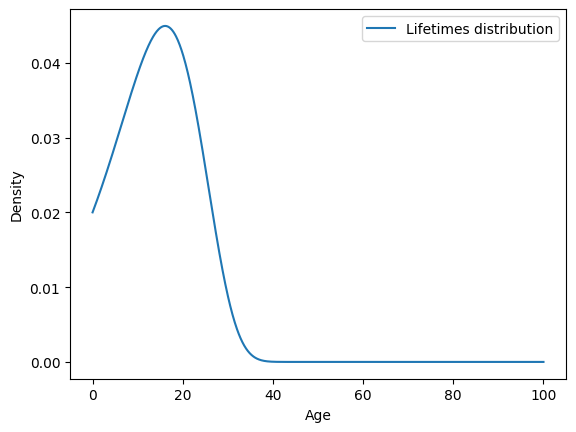

In [17]:
durations = np.linspace(0, 100, num=1000)
fig, ax = plt.subplots()
model.plot.pdf(durations, label="Lifetimes distribution")
ax.set_xlabel("Age")
ax.set_ylabel("Density")
plt.show()

In [18]:
ar_policy = renewal_policy(model, costs, a0=a0, discounting_rate=discounting_rate, nb_assets=3).optimize()
optimal_ar = ar_policy.ar
print(optimal_ar)

[[3.11636797]
 [4.10385822]
 [8.61449029]]


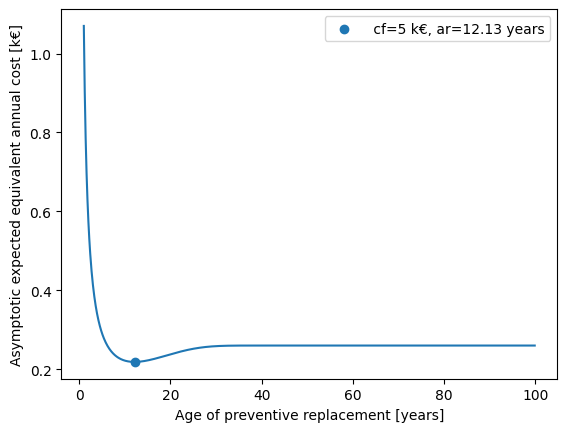

asymptotic expected equivalent annual cost with optimal ar : 0.22


In [42]:
cf = 5
cp = 1
costs= {"cf" :cf, "cp" :cp}
discounting_rate = 0.05
ar = np.arange(1, 100, 0.1)
nb_assets = ar.shape[0]

parametrized_ar_policy = renewal_policy(model, costs=costs, ar=ar, discounting_rate=discounting_rate, nb_assets=nb_assets)
za = parametrized_ar_policy.asymptotic_expected_equivalent_annual_cost()

ar_policy = renewal_policy(model, costs=costs, discounting_rate=discounting_rate, nb_assets=1).optimize()
ar_opt = ar_policy.ar  # optimal ar
za_opt = ar_policy.asymptotic_expected_equivalent_annual_cost()
plt.plot(ar, za)
plt.scatter(ar_opt, za_opt, label=f" cf={cf} k€, ar={np.round(ar_opt, 2).item()} years")
plt.xlabel("Age of preventive replacement [years]")
plt.ylabel("Asymptotic expected equivalent annual cost [k€]")
plt.legend()
plt.show()
print("asymptotic expected equivalent annual cost with optimal ar :", np.round(za_opt, 2))

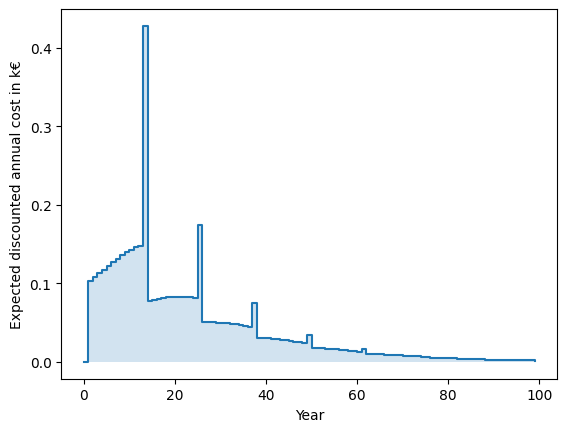

In [55]:
timeline = np.arange(0, 100, 1)
cumul_total_cost = ar_policy.expected_total_cost(timeline)
total_cost_per_year = np.diff(cumul_total_cost, prepend=0)
plt.plot(timeline, total_cost_per_year, drawstyle="steps-post")
plt.fill_between(timeline, total_cost_per_year, where=total_cost_per_year >= 0, step="post", alpha=0.2)
plt.xlabel("Year")
plt.ylabel("Expected discounted annual cost in k€")
plt.show()

(200,)
(200,)


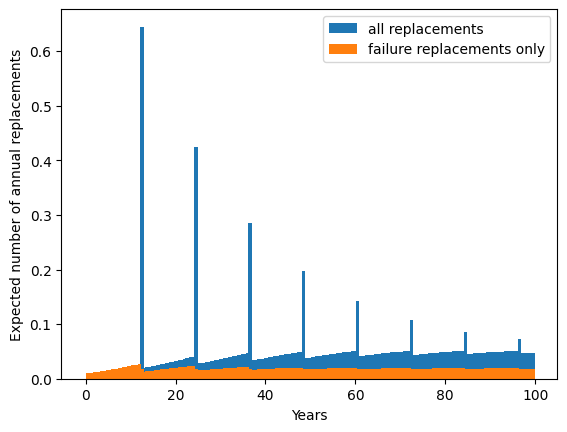

In [61]:
timeline = np.arange(0, 100, 0.5)
policya = renewal_policy(model, costs={"cf" :1, "cp" :1}, ar=ar_opt, discounting_rate=0, nb_assets=1)
policyb = renewal_policy(model, costs={"cf" :1, "cp" :0}, ar=ar_opt, discounting_rate=0, nb_assets=1)
mt = policya.expected_total_cost(timeline)
mf = policyb.expected_total_cost(timeline)
print(mt.shape)
print(mf.shape)
plt.bar(
    timeline,
    np.diff(mt, prepend=0),
    label="all replacements",
)
plt.bar(
    timeline,
    np.diff(mf, prepend=0),
    label="failure replacements only",
)
plt.xlabel("Years")
plt.ylabel("Expected number of annual replacements")
plt.legend()
plt.show()

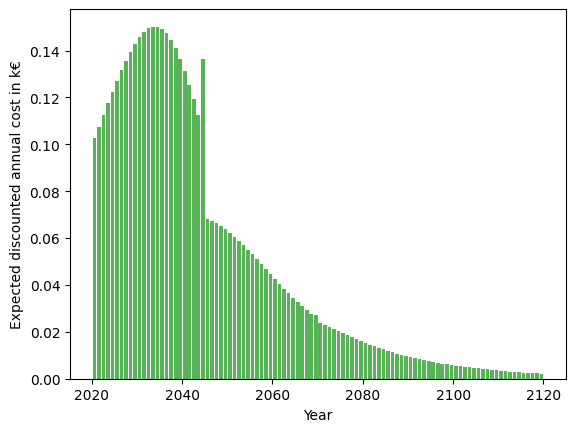

In [62]:
# Choix d'une stratégie de remplacement a priori, sans calcul d'optimalité.
ar = 25
# Projection des conséquences de la stratégie
sub_opti_ar_policy = renewal_policy(model, costs=costs, ar=25, discounting_rate=discounting_rate, nb_assets=1)
# Cout de long terme de la stratégie
# Distribution des coûts de la stratégie au cours du temps
dt = 0.5
step = int(1 / dt)
t = np.arange(0, 100 + dt, dt)
z = sub_opti_ar_policy.expected_total_cost(t)
y = t[::step][1:]
q = np.diff(z[::step])
plt.bar(2020 + y, q, align="edge", width=-0.8, alpha=0.8, color="C2")
plt.xlabel("Year")
plt.ylabel("Expected discounted annual cost in k€")
plt.show()

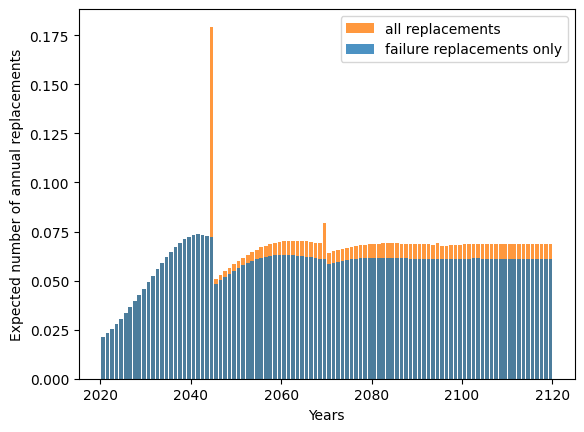

In [64]:
policya = renewal_policy(model, costs={"cf" :1, "cp" :1}, ar=ar, discounting_rate=0, nb_assets=1)
policyb = renewal_policy(model, costs={"cf" :1, "cp" :0}, ar=ar, discounting_rate=0, nb_assets=1)

# Distribution des remplacements de la stratégie au cours du temps
mt = policya.expected_total_cost(t)
mf = policyb.expected_total_cost(t)
qt = np.diff(mt[::step])
qf = np.diff(mf[::step])
plt.bar(
    y + 2020,
    qt,
    align="edge",
    width=-0.8,
    alpha=0.8,
    color="C1",
    label="all replacements",
)
plt.bar(
    y + 2020,
    qf,
    align="edge",
    width=-0.8,
    alpha=0.8,
    color="C0",
    label="failure replacements only",
)

plt.xlabel("Years")
plt.ylabel("Expected number of annual replacements")
plt.legend()
plt.show()